
<a id='0'></a>

# Weather rain project


## Name :Salmah Saad Hamud alqrni

## ID   : 445816858

Rains are essential part of our lives. Clouds give the gift of rains to humans. Weather department tries to forecast when will it rain. So, I try to predict whether it will rain in Australia tomorrow or not.

![Rains](http://bestanimations.com/Nature/Water/rain/rain-nature-animated-gif-17.gif)

 implement Logistic Regression with Python and Scikit-Learn and build a classifier to predict whether or not it will rain tomorrow in Australia.  I train a binary classification model using Logistic Regression. I have used the **Rain in Australia** dataset for this project.

## The problem statement <a class="anchor" id="1"></a>

 
Accurate rainfall prediction is crucial for various sectors in Australia, including agriculture, water management, and disaster preparedness. The current weather forecasting methods, while informative, often lack precise predictions for specific locations and timeframes. This leads to uncertainties that can negatively impact decision-making and resource allocation.

Developing a reliable model for predicting rainfall in Australia tomorrow would provide valuable information for individuals and organizations to:

- Plan agricultural activities: Farmers could optimize irrigation schedules and planting times based on anticipated rainfall.
- Manage water resources: Water authorities could adjust reservoir levels and distribution plans to ensure adequate water supply.
- Prepare for potential floods or droughts: Early warnings of potential heavy rainfall or prolonged dry periods could enable communities to take necessary precautions.




# Objective:
This research aims to develop a robust and accurate machine learning model for predicting rainfall in Australia tomorrow. The model will be trained on historical weather data, including temperature, humidity, wind speed, and cloud cover, along with actual rainfall events. By analyzing these data points, the model will learn to identify patterns and relationships that can predict the probability of rainfall for any given location.

The specific objectives of this research include:

- Collect and pre-process a comprehensive dataset of historical weather data for Australia.
- Explore and analyze the data to identify relevant features and relationships.
- Develop and implement various machine learning algorithms for rainfall prediction.
- Evaluate the performance of each model using metrics like accuracy, precision, recall, and F1-score.
- Optimize the chosen model through hyperparameter tuning.
- Develop a user-friendly interface for the model to facilitate its use by various stakeholders.

## Import libraries <a class="anchor" id="2"></a>


The first step in building the model is to import the necessary libraries.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Drop  RISK_MM variable <a class="anchor" id="4.4"></a>

It is given in the dataset description, that we should drop the `RISK_MM` feature variable from the dataset description. So, we 
should drop it as follows-

In [7]:
df.drop(['RISK_MM'], axis=1, inplace=True)

### View summary of dataset <a class="anchor" id="4.5"></a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

#### Comment


- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.



In [9]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

## Univariate Analysis <a class="anchor" id="5"></a>

#### Check for missing values

In [10]:
df['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the `RainTomorrow` target variable.

#### View the unique values

In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

The two unique values are `No` and `Yes`.

#### View the frequency distribution of values

In [13]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

#### View percentage of frequency distribution of values

In [14]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

#### Comment

- We can see that out of the total number of `RainTomorrow` values, `No` appears 77.58% times and `Yes` appears 22.42% times.

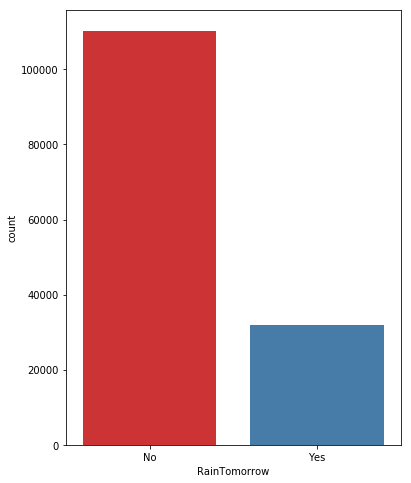

In [15]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

#### Interpretation

- The above univariate plot confirms our findings that -

   - The `No` variable have 110316 entries, and
   
   - The `Yes` variable have 31877 entries.



We can plot the bars horizontally as follows :

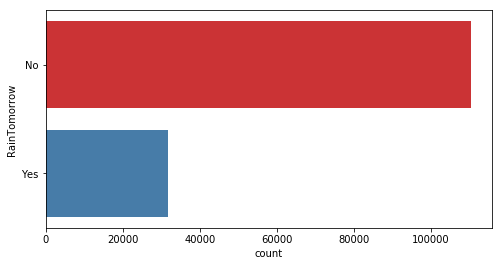

In [16]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

## Bivariate Analysis <a class="anchor" id="6"></a>

### Explore Categorical Variables <a class="anchor" id="6.2"></a>

In [17]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# view the categorical variables

df[categorical].head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No



#### Missing values in categorical variables

In [19]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [20]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [23]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


#### Feature Engineering of Date Variable

In [24]:
df['Date'].dtypes

dtype('O')

In [25]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [27]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [28]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [30]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [31]:
# preview the dataset again

df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [32]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [33]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### Explore Numerical Variables <a class="anchor" id="6.5"></a>

In [58]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [59]:
# view the numerical variables

df[numerical].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

### Missing values in numerical variables

In [60]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [61]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'WindSpeed3pm')

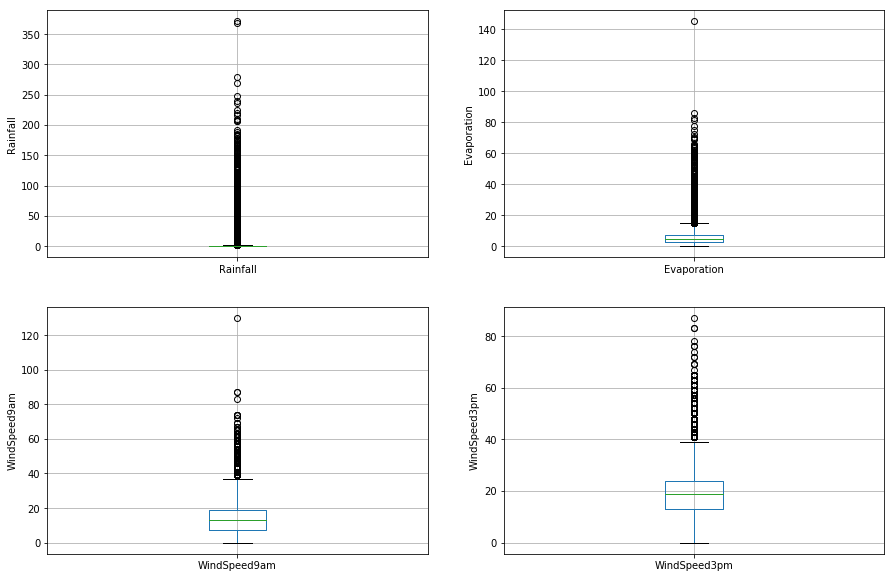

In [62]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

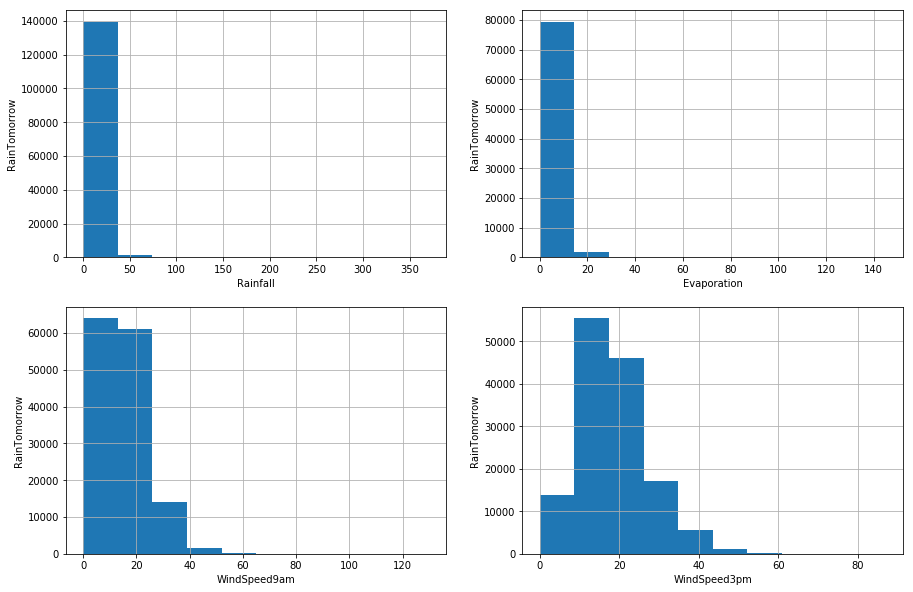

In [63]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [64]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [65]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [66]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [67]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

## 7. Multivariate Analysis <a class="anchor" id="7"></a>


- An important step in EDA is to discover patterns and relationships between variables in the dataset.

- I will use heat map and pair plot to discover the patterns and relationships in the dataset.

- First of all, I will draw a heat map.

In [68]:
correlation = df.corr()

### Heat Map <a class="anchor" id="7.1"></a>

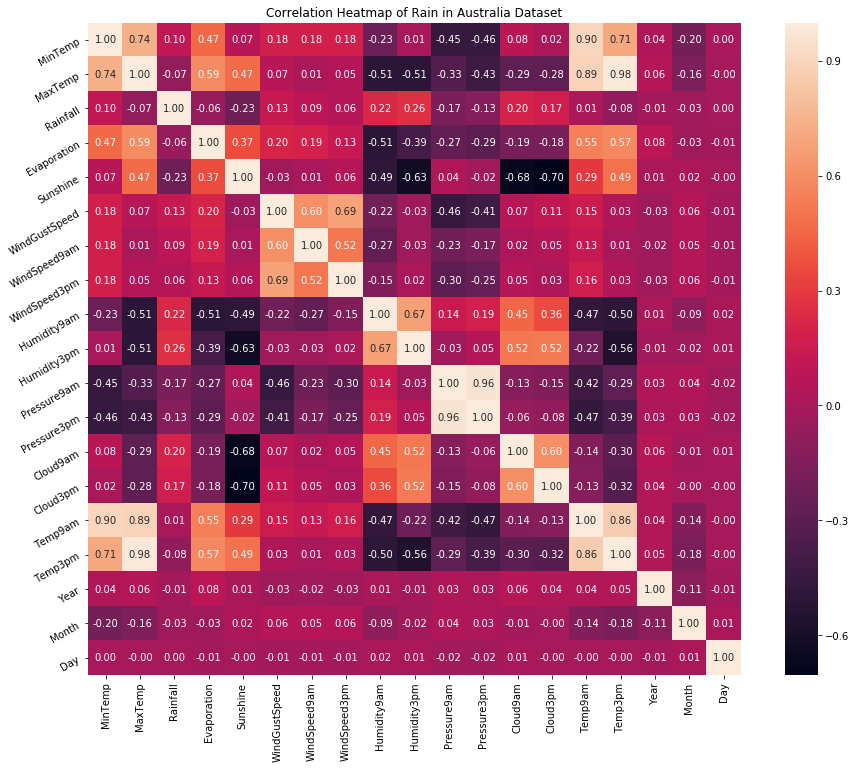

In [69]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

#### Interpretation



From the above correlation heat map, we can conclude that :-

- `MinTemp` and `MaxTemp` variables are highly positively correlated (correlation coefficient = 0.74).

- `MinTemp` and `Temp3pm` variables are also highly positively correlated (correlation coefficient = 0.71).

- `MinTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.90).

- `MaxTemp` and `Temp9am` variables are strongly positively correlated (correlation coefficient = 0.89).

- `MaxTemp` and `Temp3pm` variables are also strongly positively correlated (correlation coefficient = 0.98).

- `WindGustSpeed` and `WindSpeed3pm` variables are highly positively correlated (correlation coefficient = 0.69).

- `Pressure9am` and `Pressure3pm` variables are strongly positively correlated (correlation coefficient = 0.96).

- `Temp9am` and `Temp3pm` variables are strongly positively correlated (correlation coefficient = 0.86).


### Pair Plot <a class="anchor" id="7.2"></a>


First of all, I will define extract the variables which are highly positively correlated. 

In [70]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

Now, I will draw pairplot to depict relationship between these variables.

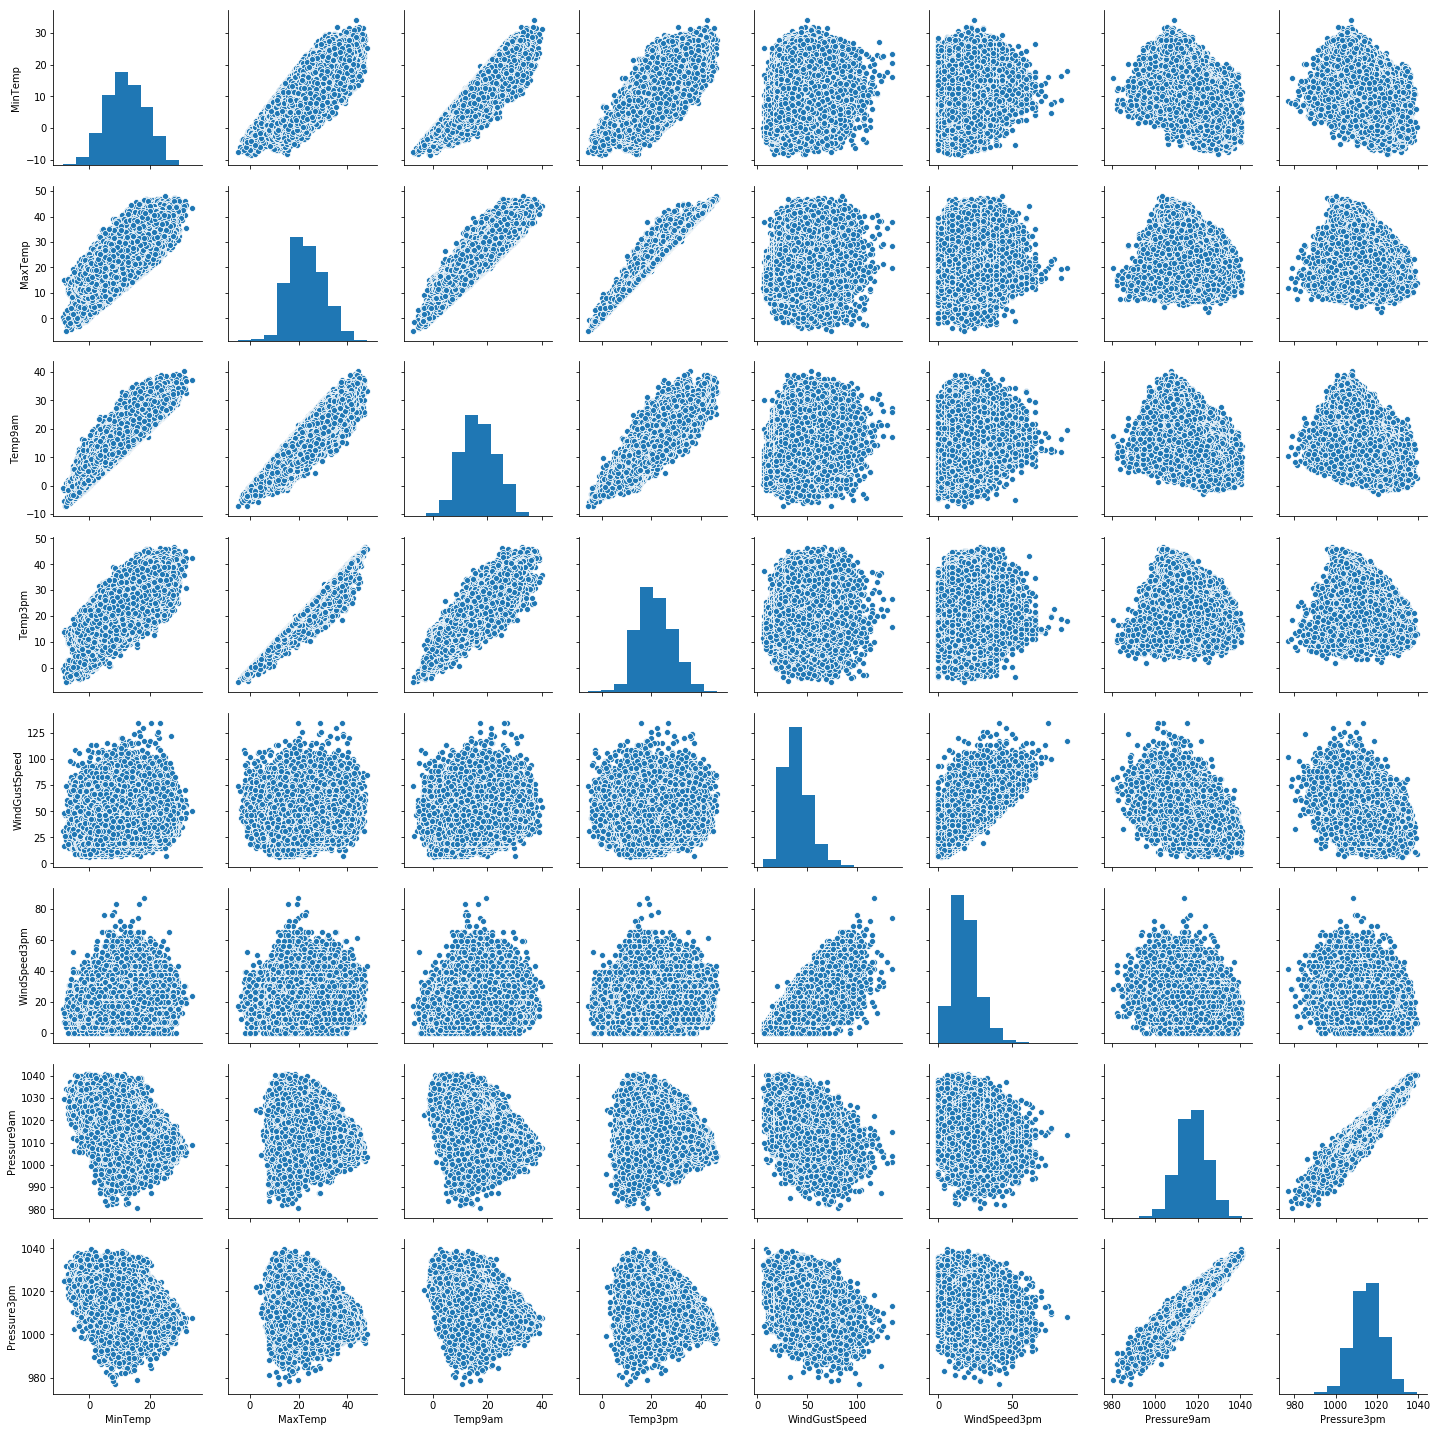

In [71]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### Interpretation


- I have defined a variable `num_var` which consists of `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`, `WindGustSpeed`, `WindSpeed3pm`, `Pressure9am` and `Pressure3pm` variables.

- The above pair plot shows relationship between these variables.

## 8. Declare feature vector and target variable <a class="anchor" id="8"></a>

In [72]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## 9. Split data into separate training and test set <a class="anchor" id="9"></a>

In [73]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [74]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [76]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [77]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables <a class="anchor" id="10.1"></a>



In [78]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [79]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [80]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


In [81]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [82]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [83]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### Engineering missing values in categorical variables <a class="anchor" id="10.2"></a>

In [84]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [85]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [86]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [87]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [88]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [89]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [90]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables <a class="anchor" id="10.3"></a>


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [91]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [92]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [93]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [94]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [95]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [96]:
X_train[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.867486      51.509547    1017.640649    1015.241101   
std        18.935587      20.530723       6.738680       6.675168   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        4.651801       4.703588      16.995062      21.688643   
std         2.292726       2.117847       6.463772       6.855649   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.300000   
max         9.000000       8.000000      40.200000      46.700000   

                Year          Month            Day  
count  113754.000000  113754.000000  113754.000000  
mean     2012.759727       6.404021      15.710419  
std         2.540419       3.427798       8.796821  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

### Encode categorical variables <a class="anchor" id="10.4"></a>

In [97]:
# print categorical variables

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [98]:
X_train[categorical].head()

Location WindGustDir WindDir9am WindDir3pm RainToday
110803   Witchcliffe           S        SSE          S        No
87289         Cairns         ENE        SSE         SE       Yes
134949  AliceSprings           E         NE          N        No
85553         Cairns         ESE        SSE          E        No
16110      Newcastle           W          N         SE        No

In [99]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [100]:
X_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
110803   Witchcliffe     13.9     22.6       0.2          4.8       8.5   
87289         Cairns     22.4     29.4       2.0          6.0       6.3   
134949  AliceSprings      9.7     36.2       0.0         11.4      12.3   
85553         Cairns     20.5     30.1       0.0          8.8      11.1   
16110      Newcastle     16.8     29.2       0.0          4.8       8.5   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
110803           S           41.0        SSE          S  ...       1013.4   
87289          ENE           33.0        SSE         SE  ...       1013.1   
134949           E           31.0         NE          N  ...       1013.6   
85553          ESE           37.0        SSE          E  ...       1010.8   
16110            W           39.0          N         SE  ...       1015.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday_0  RainToday_1  Year  \
110803       5.0       5.0     18.8     20.4            0            1  2014   
87289        7.0       5.0     26.4     27.5            1            0  2015   
134949       1.0       1.0     28.5     35.0            0            1  2014   
85553        2.0       3.0     27.3     29.4            0            1  2010   
16110        5.0       8.0     22.2     27.0            0            1  2012   

        Month  Day  
110803      4   25  
87289      11    2  
134949     10   19  
85553      10   30  
16110      11    8  

[5 rows x 25 columns]

We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.

Now, I will create the `X_train` training set.

In [101]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [102]:
X_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
110803     13.9     22.6       0.2          4.8       8.5           41.0   
87289      22.4     29.4       2.0          6.0       6.3           33.0   
134949      9.7     36.2       0.0         11.4      12.3           31.0   
85553      20.5     30.1       0.0          8.8      11.1           37.0   
16110      16.8     29.2       0.0          4.8       8.5           39.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  NNW  NW  S  \
110803          20.0          28.0         65.0         55.0  ...    0   0  1   
87289            7.0          19.0         71.0         59.0  ...    0   0  0   
134949          15.0          11.0          6.0          2.0  ...    0   0  0   
85553           22.0          19.0         59.0         53.0  ...    0   0  0   
16110            0.0           7.0         72.0         53.0  ...    0   0  0   

        SE  SSE  SSW  SW  W  WNW  WSW  
110803   0    0    0   0  0    0    0  
87289    1    0    0   0  0    0    0  
134949   0    0    0   0  0    0    0  
85553    0    0    0   0  0    0    0  
16110    1    0    0   0  0    0    0  

[5 rows x 118 columns]

Similarly, I will create the `X_test` testing set.

In [103]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [104]:
X_test.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
86232      17.4     29.0       0.0          3.6      11.1           33.0   
57576       6.8     14.4       0.8          0.8       8.5           46.0   
124071     10.1     15.4       3.2          4.8       8.5           31.0   
117955     14.4     33.4       0.0          8.0      11.6           41.0   
133468      6.8     14.3       3.2          0.2       7.3           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  NNW  NW  S  \
86232           11.0          19.0         63.0         61.0  ...    0   0  0   
57576           17.0          22.0         80.0         55.0  ...    0   0  1   
124071          13.0           9.0         70.0         61.0  ...    0   0  0   
117955           9.0          17.0         40.0         23.0  ...    0   0  0   
133468          15.0          13.0         92.0         47.0  ...    0   0  0   

        SE  SSE  SSW  SW  W  WNW  WSW  
86232    0    0    0   0  0    0    0  
57576    0    0    0   0  0    0    0  
124071   0    1    0   0  0    0    0  
117955   0    0    0   1  0    0    0  
133468   0    0    0   0  0    0    0  

[5 rows x 118 columns]

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

## Feature Scaling <a class="anchor" id="11"></a>

In [105]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm  ...            NNW             NW  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean       68.867486      51.509547  ...       0.054530       0.060288   
std        18.935587      20.530723  ...       0.227061       0.238021   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%        57.000000      37.000000  ...       0.000000       0.000000   
50%        70.000000      52.000000  ...       0.000000       0.000000   
75%        83.000000      65.000000  ...       0.000000       0.000000   
max       100.000000     100.000000  ...       1.000000       1.000000   

                   S             SE            SSE            SSW  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.067259       0.101605       0.064059       0.056402   
std         0.250471       0.302130       0.244860       0.230698   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  SW              W            WNW            WSW  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.064464       0.069334       0.060798       0.065483  
std         0.245578       0.254022       0.238960       0.247378  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 118 columns]

In [106]:
cols = X_train.columns

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [108]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [109]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [110]:
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.484406       0.530004       0.210962       0.236312   
std         0.151741       0.134105       0.369949       0.129528   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.375297       0.431002       0.000000       0.183486   
50%         0.479810       0.517958       0.000000       0.220183   
75%         0.593824       0.623819       0.187500       0.247706   
max         1.000000       1.000000       1.000000       1.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.554562       0.262667       0.254148       0.326575   
std         0.190999       0.101682       0.160119       0.152384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.565517       0.193798       0.127273       0.228070   
50%         0.586207       0.255814       0.236364       0.333333   
75%         0.600000       0.310078       0.345455       0.421053   
max         1.000000       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm  ...            NNW             NW  \
count  113754.000000  113754.000000  ...  113754.000000  113754.000000   
mean        0.688675       0.515095  ...       0.054530       0.060288   
std         0.189356       0.205307  ...       0.227061       0.238021   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.570000       0.370000  ...       0.000000       0.000000   
50%         0.700000       0.520000  ...       0.000000       0.000000   
75%         0.830000       0.650000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

                   S             SE            SSE            SSW  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        0.067259       0.101605       0.064059       0.056402   
std         0.250471       0.302130       0.244860       0.230698   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  SW              W            WNW            WSW  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.064464       0.069334       0.060798       0.065483  
std         0.245578       0.254022       0.238960       0.247378  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 118 columns]

We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model training <a class="anchor" id="12"></a>

In [111]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict results <a class="anchor" id="13"></a>

In [112]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [113]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.91381393, 0.83549933, 0.8202694 , ..., 0.97674837, 0.7984706 ,
       0.30735807])

In [114]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.08618607, 0.16450067, 0.1797306 , ..., 0.02325163, 0.2015294 ,
       0.69264193])

## Check accuracy score <a class="anchor" id="14"></a>

In [115]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8501


In [116]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [117]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8477


In [118]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8477
Test set score: 0.8501


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting. 


In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting. 

I will increase C and fit a more flexible model.

In [119]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8506


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

In [125]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3088  3284]]

True Positives(TP) =  20892

True Negatives(TN) =  3284

False Positives(FP) =  1175

False Negatives(FN) =  3088


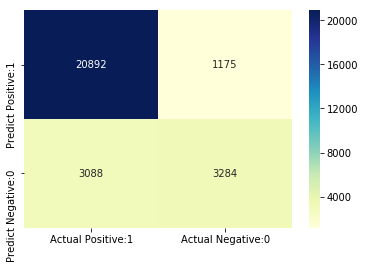

In [126]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##  Classification Metrices <a class="anchor" id="16"></a>

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Classification Accuracy <a class="anchor" id="16.2"></a>

In [128]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [129]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8501


### Classification Error <a class="anchor" id="16.3"></a>

In [130]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1499


In [131]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9468


In [132]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8712


In [133]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8712


In [134]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2635


### Specificity <a class="anchor" id="16.8"></a>

In [135]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7365


In [136]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91381393, 0.08618607],
       [0.83549933, 0.16450067],
       [0.8202694 , 0.1797306 ],
       [0.99025597, 0.00974403],
       [0.95726079, 0.04273921],
       [0.97993207, 0.02006793],
       [0.17830442, 0.82169558],
       [0.23461305, 0.76538695],
       [0.9004727 , 0.0995273 ],
       [0.8548867 , 0.1451133 ]])

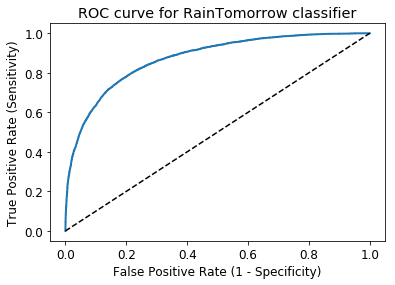

In [142]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

In [143]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


In [144]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


## Conclusion <a class="anchor" id="22"></a>

1.	The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.	Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.	The model shows no signs of overfitting.

4.	Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.	Increasing the threshold level results in increased accuracy.

6.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.	Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.


